In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
# 主成分分析のライブラリをインポート
from sklearn.decomposition import PCA

# 文系と理系が存在することを確かめられるか?

## 各変数同士の相関係数をプロット

In [2]:
# csvファイルからNumPy配列の作成
score = np.loadtxt("exam_score.csv", delimiter=",", skiprows=1)
# DataFrameの作成
df = pd.DataFrame(score, columns=['Kokugo','Shakai','Sugaku','Rika'])
df.head()

,Kokugo,Shakai,Sugaku,Rika
0,30.0,43.0,51.0,63.0
1,39.0,21.0,49.0,56.0
2,29.0,30.0,23.0,57.0
3,95.0,87.0,77.0,100.0
4,70.0,71.0,78.0,67.0


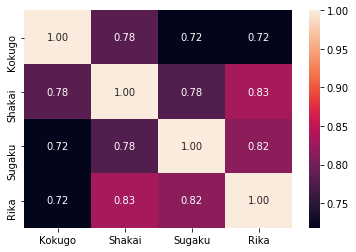

In [3]:
# 相関係数を計算
correlation = df.corr()
# seabornのヒートマップを使って綺麗に表示
# annot: annotationの略。値を表示するかどうか
# fmt: プロットのフォーマットを設定。'.2f'で小数点以下2桁まで
sns.heatmap(correlation, annot=True, fmt='.2f')

## 主成分分析

主成分分析のコンセプトはデータの要約です｡今回の場合は、4次元(国語、社会、数学、理科)のデータを2次元に要約します。

データを要約する過程で文系理系の軸が現れるかをみてみます。

In [4]:
# 文系=L / 理系=S
df['bunkei_rikei'] = np.where(df['Kokugo'] + df['Shakai'] - df['Sugaku'] - df['Rika'] >=0, 'L', 'S')
df.head()

,Kokugo,Shakai,Sugaku,Rika,bunkei_rikei
0,30.0,43.0,51.0,63.0,S
1,39.0,21.0,49.0,56.0,S
2,29.0,30.0,23.0,57.0,S
3,95.0,87.0,77.0,100.0,L
4,70.0,71.0,78.0,67.0,S


In [5]:
df['bunkei_rikei'].value_counts()

S    90
L    76
Name: bunkei_rikei, dtype: int64

Text(0, 0.5, 'PC 1')

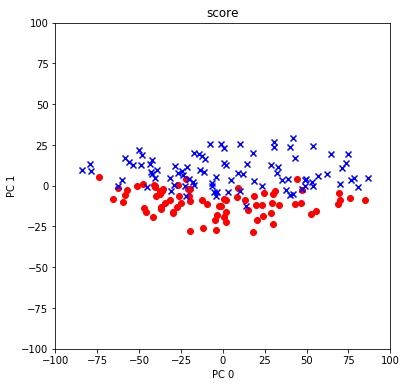

In [6]:
X = score
# 主成分を2つまで取得
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# 特徴抽出による可視化
# PC0(第1主成分)とPC1(第2主成分)について散布図を表示
plt.figure(figsize=(6, 6))
# 文系と理系で色と点を変えてプロット
for target, marker, color in zip('LS', 'ox', 'rb'):
    plt.scatter(X_pca[df['bunkei_rikei']==target, 0], X_pca[df['bunkei_rikei']==target, 1], marker=marker, color=color)

plt.xlim([-100, 100])
plt.ylim([-100, 100])
plt.title('score')
plt.xlabel('PC 0')
plt.ylabel('PC 1')

 プロットを見ると、第2主成分 (PC1) が文系/理系の軸のような気がします。

##### 寄与率
　寄与率とは､ひとつの主成分がデータ全体の情報をどれだけの割合拾えているかを表す指標です｡主成分分析においては､この固有値が各主成分の持つ情報量を表す指標として利用できます｡定義より､寄与率は0~1の値を取り､その総和は1になります｡寄与率が高ければ高いほど､その主成分はデータを効率よく要約する良い主成分であるといえます｡

In [7]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第1主成分の寄与率 第2主成分の寄与率]
print(pca.explained_variance_ratio_)

[0.83141975 0.07912514]


　第1主成分が80%以上の説明力を持っています。それに比べて、僕が文系/理系のシグナルと睨んだ第2主成分は約8%とかなり微弱ですね。

##### 因子負荷量

　因子負荷量（主成分負荷量）とは､主成分がもとの特徴量をどのように合成して作られたものなのかを表す指標です｡それぞれの主成分に対して､もとの各特徴量との相関係数にあたる数値が割り当てられており､-1~+1の値を取ります｡因子負荷量を参照することで､導かれた主成分の意味付けを行うことができます｡ひとつの主成分が､どのような特徴量と相関が強いのか（軸が同じ向きや逆の向きになっているのか）､あるいはどのような特徴量とは相関がないのか（軸が直行しているかどうか）に着目することで､主成分の表す意味が浮かび上がってきます｡
 
　数式的には､主成分に含まれる各特徴量の係数 $h_j$に､その主成分の固有値 $l_i$の平方根 $\sqrt{l_i}$を掛け算して表現されます｡重要なのは､  
$h_j$を利用して定義されていることから､もともとの特徴量との相関が考慮されていることが確認できることです｡

In [8]:
# 主成分の係数h_jを出力(それぞれ、国語、社会、数学、理科の係数です)
pca.components_

array([[ 0.47084973,  0.48937011,  0.54982601,  0.48632169],
       [-0.77353839, -0.15002283,  0.54851909,  0.27974687]])

In [9]:
# 固有値lのルートを取る
np.sqrt(pca.explained_variance_)

array([40.60299264, 12.52579007])

In [10]:
# 因子負荷量を出力
# ['Kokugo, 'Shakai, 'Sugaku', 'Rika']
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[19.11790816, 19.86989087, 22.32458143, 19.74611605],
       [-9.68917951, -1.87915453,  6.87063499,  3.50405057]])

##### この結果を解釈してみましょう。
 
- 第1主成分

 第1主成分は
 ```
 [Kokugo, 'Shakai, 'Sugaku', 'Rika'] 
 
 =  [19.11790816, 19.86989087, 22.32458143, 19.74611605]
 ```
 となっており、教科間でほとんど差がありませんね。これはみなさんが指摘してくれた通り、生徒の**「地頭の良さ」**を表すものだと解釈してしまってよいと思います。やはり地頭の良さは数学に出るようですね。
 
 
 - 第2主成分
 
 第2主成分は
 ```
 [Kokugo, 'Shakai, 'Sugaku', 'Rika'] 
 
 =  [-9.68917951, -1.87915453,  6.87063499,  3.50405057]
 ```
 となっており、国語・社会ではマイナスの値が、数学・理科ではプラスの値が出ています。特に絶対値に注目すると、マイナスは国語が、プラスは数学の値が大きいです。この第2主成分は **「理系らしさ」**を数値化していると言って良いのではないでしょうか?


 - 結論
 
寄与率を見ると、第1主成分が支配的で80%以上を占めています。ですから、みなさんの主張の通り、「文系/理系」というのは
 
>　ほとんど無きに等しい (定量的には地頭の良さの1/10程度)

　といえます。しかし、微弱なシグナルだが主成分分析をもってすれば確かに
 
>「理系と文系が存在すること」を証明することができる
               
  　ようです。おそらくこの基準にしたがって分類器を作成することも可能でしょう。

Text(0, 0.5, 'Literature/Science')

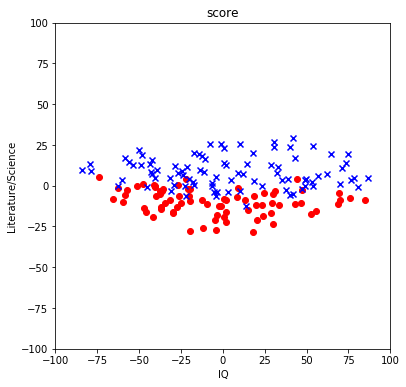

In [11]:
X = score
# 主成分を2つまで取得
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

# 特徴抽出による可視化
# PC0(第1主成分)とPC1(第2主成分)について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip('LS', 'ox', 'rb'):
    plt.scatter(X_pca[df['bunkei_rikei']==target, 0], X_pca[df['bunkei_rikei']==target, 1], marker=marker, color=color)

plt.xlim([-100, 100])
plt.ylim([-100, 100])
plt.title('score')
plt.xlabel('IQ')
plt.ylabel('Literature/Science')